In [6]:
import numpy as np
import scipy
import math
import os
import cv2
import math
from scipy import misc
import numpy as np
from numpy.linalg import inv
from skimage.draw import circle
import matplotlib.pyplot as plt
import time
from random import randint


sift = cv2.xfeatures2d.SIFT_create()


mypicdict=[]
rootdir="101_ObjectCategories"
classes=0
dude=False
for subdir, dirs, files in os.walk(rootdir):  #loads my files into a dictionary
    classes+=1
    for file in files:
        if file != ".DS_Store":
            mypicdict.append(os.path.join(subdir, file))
            dude=True
    if dude is True:
        break
            
print "is done creating dic"
mymatrix=np.zeros((0, 128))
start = time.time()
for pic in mypicdict:
    img1_ = cv2.imread(pic)
    img1= cv2.cvtColor(img1_,cv2.COLOR_BGR2GRAY)
    kp1, des1 = sift.detectAndCompute(img1,None)
    try:
        mymatrix=np.concatenate((mymatrix, des1[0:1]),  axis=0)
        #print mymatrix.shape
    except Exception:
        print Exception
        continue
        
print "is done!"
end = time.time()
print(end - start)
#soft Assignment (Weighted distances.  This is totaly like the machine learning lab)

# each descriptor votes and then make histogram.   Each dot is a single dot
                

is done creating dic
is done!
1.18571901321


My number changed is  16
My number changed is  9
My number changed is  0
i am done


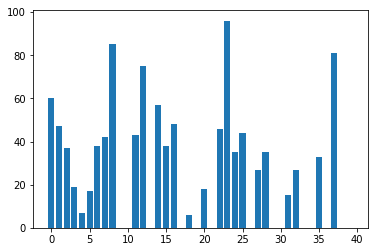

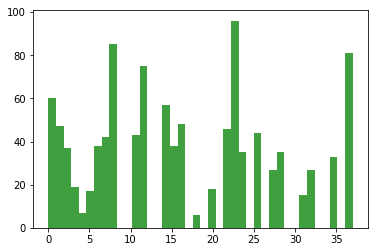

In [7]:
#namedtuple
#now time to cluster!. 
class point:
    def __init__(self, matrix):
        self.matrix=matrix
class cluster:
    def __init__(self, point, number):
        self.number=number
        self.center_point=point
        self.mylist=[]
        self.mylist.append(point)

    def distance(self, listof):
        return np.linalg.norm(self.center_point.matrix-listof)
    def calcNewCentroid(self):
        new_center=np.zeros((1,128))
        for point in self.mylist:
            new_center+=point.matrix
        new_center/=len(self.mylist) 
        self.center=new_center
            
        
mycenteriods=[]
classes=40
for x in range(classes):
    mycenteriods.append(cluster(point(mymatrix[randint(0,mymatrix.shape[0]-1),:]), x))
    
    
for x in range(mymatrix.shape[0]):
    smallest=10000000000000000
    loc=-1
    for y in range(len(mycenteriods)):
        temp=mycenteriods[y].distance(mymatrix[x])
        #print temp
        if temp<=smallest:
            smallest=temp
            loc=y
            #print np.asarray([mymatrix[x]])
            #print  mycenteriods[loc].mylist.shape, "before"
    mycenteriods[loc].mylist.append( point(np.asarray([mymatrix[x]])))
            #print  mycenteriods[loc].mylist.shape, "after"
            
for droid in mycenteriods:
    droid.calcNewCentroid()
numberchanged=10    
while numberchanged>5:
    numberchanged=0
    for x in mycenteriods:
        for point in x.mylist:
            bestdistance=100000000000
            checking=point.matrix
            bestcentroid=None
            for droid in mycenteriods:
                tempdist=droid.distance(checking)                
                if tempdist<bestdistance:
                    bestdistance=tempdist
                    bestcentroid=droid                    
            if bestcentroid!=x:
                #print "i change it"
                #print bestcentroid.mylist.shape, checking.shape
                #print "before ", len(x.mylist)
                x.mylist.remove(point)
                #print "after ", len(x.mylist)
                bestcentroid.mylist.append(point)
                numberchanged+=1
           # else:
                #print "i don't change it"
                
    print "My number changed is ", numberchanged
            
print "i am done"

def getClosest(myclusters, test):
    smallest_dist=10000000000
    location_of_it=-1
    i=0
    for clust in myclusters:
        temp_dist=clust.distance(test) 
        if temp_dist<smallest_dist:
            smallest_dist=temp_dist
            location_of_it=i
        i+=1
    return location_of_it  
    

imageToTest=cv2.imread("test.jpg")
img1= cv2.cvtColor(img1_,cv2.COLOR_BGR2GRAY)
kp1, des1 = sift.detectAndCompute(img1,None)
mybar=[0]*len(mycenteriods)
myhist=[]
for x in range(des1.shape[0]):
    val=getClosest(mycenteriods, des1[x])
    #print val
    mybar[val]+=1
    myhist.append(val)
    
#print myhist
    
    
import matplotlib.pyplot as plt


# the histogram of the data

plt.bar(np.arange(len(mybar)),mybar )
plt.show()
#print myhist
plt.hist(myhist,  classes, facecolor='g', alpha=0.75)
plt.show()

        
    

ImportError: No module named sklearn